In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [ ]:
# Load the data
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Drop the User ID column
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [ ]:
# Split the data
X=df.drop(columns=['User ID','Purchased'])
y=df['Purchased']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model
model=LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
cm=confusion_matrix(y_test, y_pred)
print(cm)

tn, fp, fn, tp = cm.ravel()
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

[[65  3]
 [ 7 25]]
True Positives: 25
True Negatives: 65
False Positives: 3
False Negatives: 7


In [23]:
# Calculate the accuracy, error, and precision
accuracy=accuracy_score(y_test, y_pred)
error=1-accuracy
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred, average='binary')

print('Accuracy:', accuracy)
print('Error:', error)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9
Error: 0.09999999999999998
Precision: 0.8928571428571429
Recall: 0.78125


<Axes: >

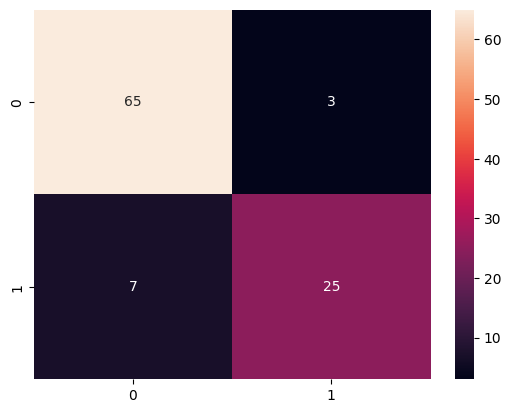

In [ ]:
# Plot the confusion matrix
sns.heatmap(cm,annot=True)